In [314]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [315]:
df = pd.read_csv('Final_Cleaned.csv', encoding='utf-8', sep=';')
columns_to_drop = df.columns[df.count() < 20000]
df = df.drop(columns=columns_to_drop)
df['Age'] = 2023 - df['constructed']
df_clean = df.drop(columns=['road', 'seller', 'latitude', 'longitude', 'full_address', 'zip_address',
                            'link to seller', 'city_3', 'zip address', 'city_2', 'zip',
                           'extra', 'constructed', 'days at current seller'])

In [316]:
new_column_names = {}

# Iterate through the existing column names and generate the new names
for column in df_clean.columns:
    new_name = column.lower().replace(" ", "_")  # Convert to lowercase and replace spaces
    new_column_names[column] = new_name

# Rename the columns using the generated names
df_clean.rename(columns=new_column_names, inplace=True)

In [317]:
df_clean.loc[df_clean['land_area'].isna(), 'land_area'] = df_clean['area']
df_clean = df_clean.dropna().reset_index(drop=True)
df_clean.shape

(29282, 21)

Add or remove distances to cities and the municipalities.

In [318]:
df_final = df_clean.drop(columns=['city', 'municipal',
                                 'distance_to_copenhagen', 'distance_to_aarhus', 'distance_to_odense', 'distance_to_aalborg'])
#df_final = df_clean.drop(columns=['city', 'residents', 'municipal', 'distance_to_city'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29282 entries, 0 to 29281
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29282 non-null  float64
 1   energy               29282 non-null  object 
 2   building_type        29282 non-null  object 
 3   udbetaling           29282 non-null  float64
 4   area                 29282 non-null  float64
 5   land_area            29282 non-null  float64
 6   rooms                29282 non-null  float64
 7   ejerudg              29282 non-null  float64
 8   days_active          29282 non-null  float64
 9   distance_to_city     29282 non-null  float64
 10  closest_city         29282 non-null  object 
 11  residents            29282 non-null  float64
 12  municipal_tax_rate   29282 non-null  float64
 13  grundskyldspromille  29282 non-null  float64
 14  age                  29282 non-null  float64
dtypes: float64(12), object(3)
memory usa

In [319]:
# Get the value counts of 'building_type' column
building_type_counts = df_final['building_type'].value_counts()

# Get the top N most common values
top_building_types = building_type_counts.head(4).index.tolist()

# Filter the DataFrame to keep only the rows with top N building types
df_final = df_final[df_final['building_type'].isin(top_building_types)]
#df_final['building_type'].value_counts()

In [320]:
# Create dummy variables for the 'Category' column
dummy_1 = pd.get_dummies(df_final['building_type'], prefix='type',drop_first=True)
dummy_2 = pd.get_dummies(df_final['energy'], prefix = 'energy',drop_first=True)
dummy_3 = pd.get_dummies(df_final['closest_city'], prefix = 'close',drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_final = pd.concat([df_final, dummy_1,dummy_2, dummy_3], axis=1)
df_final = df_final.drop(columns=['energy', 'building_type', 'closest_city'])
df_final

,price,udbetaling,area,land_area,rooms,ejerudg,days_active,distance_to_city,residents,municipal_tax_rate,...,type_Villa,energy_B,energy_C,energy_D,energy_E,energy_F,energy_G,close_Aarhus,close_Copenhagen,close_Odense
0,5195000.0,260000.0,82.0,563.0,5.0,4894.0,87.0,5.126456,644431.0,23.70,...,1,0,0,1,0,0,0,0,1,0
1,2595000.0,130000.0,192.0,20011.0,7.0,2077.0,6.0,72.075634,55340.0,26.30,...,0,0,0,1,0,0,0,0,0,1
2,3495000.0,175000.0,116.0,794.0,4.0,3725.0,33.0,20.688457,50818.0,24.42,...,1,0,0,1,0,0,0,0,1,0
3,4500000.0,225000.0,159.0,833.0,5.0,2862.0,229.0,42.015572,61718.0,25.26,...,1,1,0,0,0,0,0,0,1,0
4,1245000.0,65000.0,157.0,1075.0,6.0,2101.0,105.0,51.888689,51606.0,25.50,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,1695000.0,85000.0,78.0,828.0,2.0,1816.0,174.0,28.205003,94443.0,25.39,...,1,0,1,0,0,0,0,1,0,0
29276,798000.0,40000.0,98.0,928.0,3.0,1373.0,174.0,102.510592,115459.0,25.80,...,1,0,0,1,0,0,0,0,0,1
29278,695000.0,35000.0,144.0,1028.0,4.0,1610.0,404.0,18.842811,51849.0,26.10,...,1,0,0,1,0,0,0,0,0,1
29280,1750000.0,90000.0,198.0,696.0,7.0,2146.0,174.0,16.770336,38187.0,25.70,...,1,0,1,0,0,0,0,0,0,0


Drop outliers

In [321]:
column_names = df_final.columns.tolist()
print(column_names)

['price', 'udbetaling', 'area', 'land_area', 'rooms', 'ejerudg', 'days_active', 'distance_to_city', 'residents', 'municipal_tax_rate', 'grundskyldspromille', 'age', 'type_Landejendom', 'type_Rækkehus', 'type_Villa', 'energy_B', 'energy_C', 'energy_D', 'energy_E', 'energy_F', 'energy_G', 'close_Aarhus', 'close_Copenhagen', 'close_Odense']


In [322]:
columns_to_remove_outliers = ['price', 'udbetaling', 'area', 'land_area', 'rooms', 'ejerudg', 'days_active', 'age']

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in columns_to_remove_outliers:
    final = remove_outliers_iqr(df_final, column)

Drop duplicates

In [323]:
duplicates = final[final.duplicated()]
print(duplicates.shape)
final = final.drop_duplicates()
final.shape

(38, 24)


(25924, 24)

# Machine learning models

In [324]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LassoCV

In [342]:
y = final['price']
X = final.drop(columns=['price'])

In [343]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Regression

In [344]:
pipe_lr = make_pipeline(PolynomialFeatures(degree=1, include_bias=False),
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)
y_train_pred = pipe_lr.predict(X_dev)
y_test_pred = pipe_lr.predict(X_test)

train_rmse = np.sqrt(mse(y_dev, y_train_pred))
test_rmse = np.sqrt(mse(y_test, y_test_pred))
print(train_rmse,test_rmse)

1532514.6055483154 1739753.7969350151


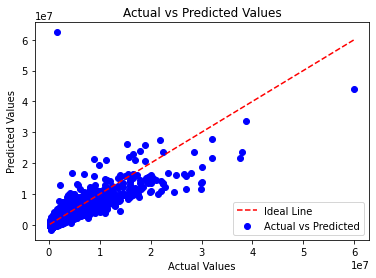

In [345]:
# Plot y_test vs y_pred
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [346]:
r2_linear = r2_score(y_test, y_test_pred)
r2_linear

0.7086520697857472

In [347]:
coefficients = pipe_lr.get_params(deep=True)
print("Coefficients:", coefficients)

Coefficients: {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=False)), ('standardscaler', StandardScaler()), ('linearregression', LinearRegression())], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(degree=1, include_bias=False), 'standardscaler': StandardScaler(), 'linearregression': LinearRegression(), 'polynomialfeatures__degree': 1, 'polynomialfeatures__include_bias': False, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__normalize': False, 'linearregression__positive': False}


In [348]:
coefficients = pipe_lr.named_steps['linearregression'].coef_
print("Coefficients:", coefficients)
scaling_factors = pipe_lr.named_steps['standardscaler'].scale_
rescaled_coefficients = coefficients / scaling_factors

Coefficients: [ 391896.38826677  403121.2199039   360855.74330218  -58231.22041575
 2257828.89561514  -73736.72659507  -68045.47375091  305394.12708631
 -142478.87721424 -217775.26801562  187490.6152834    37224.55714667
  135122.90518599  205857.07209204  -55637.78274951 -244733.26286836
 -335461.22434263 -274484.84733421 -224291.37922803 -177221.47976317
  -28300.02304019   38347.05086057  -46456.22759756]


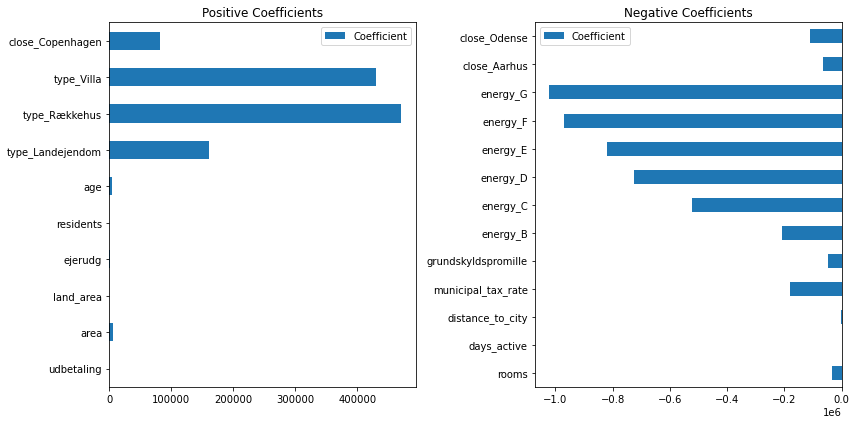

In [349]:
# Create a DataFrame with rescaled coefficients and feature names
coef_df = pd.DataFrame(rescaled_coefficients, X.columns, columns=['Coefficient'])

# Split coefficients into positive and negative parts
positive_coef = coef_df[coef_df['Coefficient'] > 0]
negative_coef = coef_df[coef_df['Coefficient'] < 0]

# Create subplots with positive and negative coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
positive_coef.plot(kind='barh', ax=ax1)
negative_coef.plot(kind='barh', ax=ax2)

ax1.set_title('Positive Coefficients')
ax2.set_title('Negative Coefficients')

plt.tight_layout()
plt.show()

## Lasso

In [299]:
perform = [] # Store performance
lambdas = np.logspace(-8, 8, 10) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=161193))
    pipe_lasso.fit(X_dev, y_dev)
    y_pred = pipe_lasso.predict(X_test)
    perform.append(mse(y_pred, y_test))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Test MSE: %.3f' % optimal.values[0])

Optimal lambda: 1e-08
Test MSE: 3090657180007.074


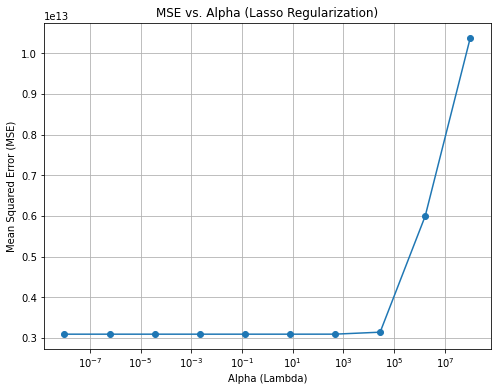

In [300]:
# Create a line plot of MSE values
plt.figure(figsize=(8, 6))
plt.plot(lambdas, perform, marker='o')
plt.xscale('log')  # Use a logarithmic scale for x-axis (optional)
plt.title('MSE vs. Alpha (Lasso Regularization)')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [301]:
from sklearn.metrics import mean_squared_error as mse

scaler = StandardScaler()

X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

lasso_model = Lasso(alpha=6158.482110660255)  # Adjust the alpha parameter as needed
lasso_model.fit(X_dev, y_dev)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE:",rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

RMSE: 1760953.1439972566
R-squared: 0.7015085115144657


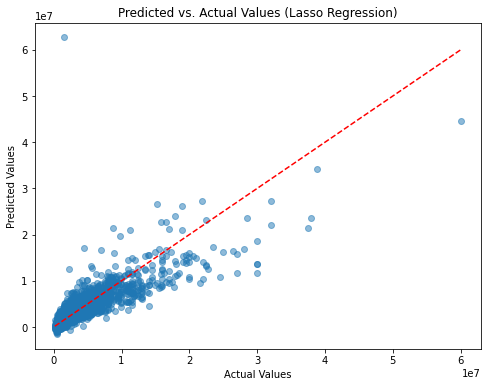

In [302]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [303]:
alphas = np.logspace(-8, 8, 100)
# Create LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=161193)

# Fit the model to your data
lasso_cv.fit(X_dev, y_dev)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print("Best Alpha:", best_alpha)

# Calculate R-squared on the test set
r2 = lasso_cv.score(X_test, y_test)
print("R-squared:", r2)

Best Alpha: 977.0099572992286
R-squared: 0.7023991328951094


## Ridge

In [304]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse



performance = [] # Store performance
lambdas = np.logspace(-8, 8, 20) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_ridge = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                           StandardScaler(),
                           Ridge(alpha=6400, random_state=161193))
    pipe_ridge.fit(X_dev,y_dev)
    y_pred = pipe_ridge.predict(X_test)
    performance.append(mse(y_pred, y_test))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(performance,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 1e-08
Validation MSE: 3096501710626.825


In [305]:
pipe_ridge = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                           StandardScaler(),
                           Ridge(alpha=6400, random_state=161193))
pipe_ridge.fit(X_dev,y_dev)
y_pred = pipe_ridge.predict(X_test)
# Calculate Mean Squared Error
print(np.sqrt(mse(y_test, y_pred)))

1759687.9583115936


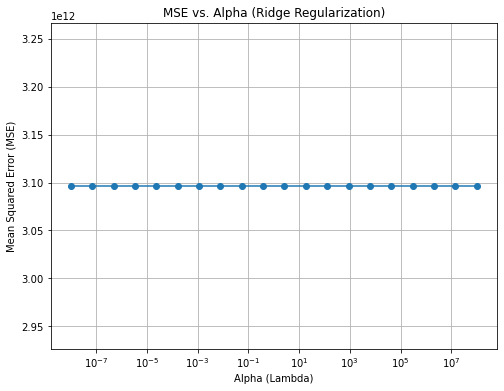

In [306]:
# Create a line plot of MSE values
plt.figure(figsize=(8, 6))
plt.plot(lambdas, performance, marker='o')
plt.xscale('log')  # Use a logarithmic scale for x-axis (optional)
plt.title('MSE vs. Alpha (Ridge Regularization)')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [307]:
from sklearn.linear_model import RidgeCV

# Create a range of alpha values on a logarithmic scale
alphas = np.logspace(-8, 8, 100)

# Create RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit the model to your data
ridge_cv.fit(X_dev, y_dev)

# Get the best alpha value
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

# Calculate R-squared on the test set
r2 = ridge_cv.score(X_test, y_test)
print("R-squared:", r2)

Best Alpha: 34.30469286314926
R-squared: 0.7028072669572822


## Model Validation

Select optimal hypterparameters

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

lambdas = np.logspace(-4, 4, 10) # Grid of lambdas

pipe_el = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                        StandardScaler(),
                        ElasticNet())

gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':lambdas,
                              'elasticnet__l1_ratio':np.linspace(0,1,10)}, 
                  scoring='neg_mean_squared_error', 
                  cv=5)

#gs.fit(X_dev, y_dev)
#print(mse(gs.predict(X_test),y_test))

In [73]:
# Create a parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': np.logspace(-6, 2, 9),      # Range of alpha values on a logarithmic scale
    'l1_ratio': np.linspace(0.0, 1.0, 11) # Range of l1_ratio values from 0 to 1
}

# Create ElasticNet model
elastic_net = ElasticNet()

# Create GridSearchCV instance
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
"""
# Fit the grid search to your data
grid_search.fit(X_dev, y_dev)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best R-squared:", r2)"""

'\n# Fit the grid search to your data\ngrid_search.fit(X_dev, y_dev)\n\n# Get the best parameters and model\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\n# Make predictions using the best model\ny_pred = best_model.predict(X_test)\n\n# Calculate R-squared on the test set\nr2 = r2_score(y_test, y_pred)\nprint("Best Parameters:", best_params)\nprint("Best R-squared:", r2)'

## Compare Models

### Learning curves

In [311]:
# LOAD FROM SCIKIT-LEARN
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lr,
                   X=X_dev,
                   y=y_dev,
                   train_sizes=np.arange(0.05, 1.05, .05),
                   scoring='neg_mean_squared_error',                 
                   cv=10)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))

mse_.head(10)

,Train,Test
sample size,,
933,2.707669e+12,4.317083e+12
1866,2.571752e+12,4.310711e+12
2799,2.544606e+12,3.428617e+12
3733,2.514826e+12,2.700668e+12
4666,2.434713e+12,2.627305e+12
5599,2.311455e+12,2.629971e+12
6532,2.298332e+12,2.527486e+12
7466,2.275969e+12,2.493619e+12
8399,2.309374e+12,2.473810e+12


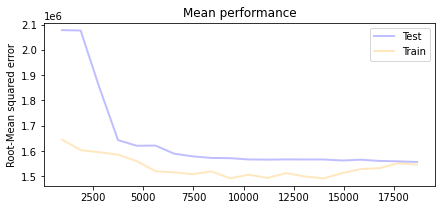

In [312]:
f_learn, ax = plt.subplots(figsize=(7,3))
ax.plot(train_sizes,np.sqrt(-test_scores.mean(1)), alpha=0.25, linewidth=2, label ='Test', color='blue') # negated, because we already use neg_MSE
ax.plot(train_sizes,np.sqrt(-train_scores.mean(1)), alpha=0.25, linewidth=2, label='Train', color='orange') # negated, because we already use neg_MSE

ax.set_title('Mean performance')
ax.set_ylabel('Root-Mean squared error')
ax.legend();

# Normal OLS for comparison

In [333]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Add a constant term to X
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3547.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:08:24   Log-Likelihood:            -4.0669e+05
No. Observations:               25924   AIC:                         8.134e+05
Df Residuals:                   25900   BIC:                         8.136e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.77e+06   4

C:\Users\marko\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Data Visualization

In [33]:
apply_fcts = ['median', 'mean']
mean_prices = df.groupby('property_type')['Kontantpris'].agg(apply_fcts)

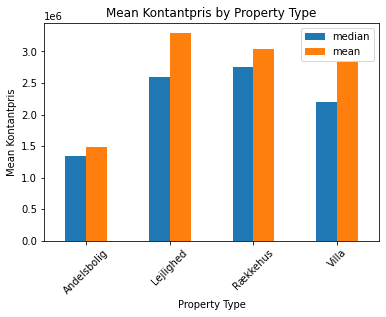

In [34]:
mean_prices.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Mean Kontantpris')
plt.title('Mean Kontantpris by Property Type')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Specify the columns and statistics you want
selected_columns = ['Kontantpris', 'Rum', 'Toilet', 'Boligareal', 'Grundareal', 'Age', 'close_city_Copenhagen', 'close_city_Odense', 'close_city_Aarhus']
selected_stats = ['count', 'mean', 'min', 'max']

# Calculate descriptive statistics
statistics = df[selected_columns].agg(selected_stats)
formatted_statistics = statistics.applymap(lambda x: int(x) if x == int(x) else int(round(x)))
formatted_statistics

,Kontantpris,Rum,Toilet,Boligareal,Grundareal,Age,close_city_Copenhagen,close_city_Odense,close_city_Aarhus
count,4782,4782,4782,4782,4782,4782,4782,4782,4782
mean,2909893,5,2,143,2102,71,0,0,0
min,95000,1,1,21,0,-1,0,0,0
max,32500000,19,7,735,339000,446,1,1,1


In [125]:
# Convert statistics to LaTeX table
latex_table = formatted_statistics.to_latex()

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Kontantpris &   Rum &  Toilet &  Boligareal &  Grundareal &   Age &  close\_city\_Copenhagen &  close\_city\_Odense &  close\_city\_Aarhus \\
\midrule
count &         4782 &  4782 &    4782 &        4782 &        4782 &  4782 &                   4782 &               4782 &               4782 \\
mean  &      2909893 &     5 &       2 &         143 &        2102 &    71 &                      0 &                  0 &                  0 \\
min   &        95000 &     1 &       1 &          21 &           0 &    -1 &                      0 &                  0 &                  0 \\
max   &     32500000 &    19 &       7 &         735 &      339000 &   446 &                      1 &                  1 &                  1 \\
\bottomrule
\end{tabular}

